# Spatial Autocorrelation in Python

In [93]:
import pysal
import numpy as np

import matplotlib
#matplotlib.use("nbagg") #this allows for plotting to happen inside the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In this note, we demonstrate how to evaluate spatial autocorrelation in Python using pysal module. We assume we have a geometry like
![](fig1.png)

# 0. Define Proximity - Spatial Weight

### 0.0 Generating [spatial weight matrix](http://pysal.readthedocs.io/en/latest/library/weights/weights.html#pysal.weights.weights.W)

There are many ways to define spatial weight, like inverse of distance or exponential decay over distance etc. Here we simply consider only nonzero weight for adjacent locations 

In [76]:
neighbors = {'A': ['B', 'D'], 'B': ['A', 'C', 'E'], 'C': ['B', 'F'], 'D': ['A', 'E', 'G'], 
             'E': ['B', 'D', 'E', 'F'], 'F': ['C', 'E', 'I'], 'G': ['D', 'H'], 'H': ['E', 'G', 'I'], 'I': ['F', 'H']}
weights = {'A': [1, 1], 'B': [1, 1, 1], 'C': [1, 1], 'D': [1, 1, 1], 'E': [1, 1, 1, 1], 
           'F': [1, 1, 1], 'G': [1, 1], 'H': [1, 1, 1], 'I': [1, 1]}

w = pysal.W(neighbors, weights)
print type(w)

<class 'pysal.weights.weights.W'>


In [65]:
w.n

9

In [66]:
w.pct_nonzero

29.62962962962963

In [67]:
weight, ids = w.full()
print type(weight), weight.shape
print ids
print weight

<type 'numpy.ndarray'> (9, 9)
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
[[ 0.  1.  0.  1.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  1.  0.  0.  0.]
 [ 1.  0.  0.  0.  1.  0.  1.  0.  0.]
 [ 0.  1.  0.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  1.  0.]]


### 0.1 row-standardized

In [78]:
w.transform='r'
weight, ids = w.full()
print weight

[[ 0.          0.5         0.          0.5         0.          0.          0.
   0.          0.        ]
 [ 0.33333333  0.          0.33333333  0.          0.33333333  0.          0.
   0.          0.        ]
 [ 0.          0.5         0.          0.          0.          0.5         0.
   0.          0.        ]
 [ 0.33333333  0.          0.          0.          0.33333333  0.
   0.33333333  0.          0.        ]
 [ 0.          0.25        0.          0.25        0.25        0.25        0.
   0.          0.        ]
 [ 0.          0.          0.33333333  0.          0.33333333  0.          0.
   0.          0.33333333]
 [ 0.          0.          0.          0.5         0.          0.          0.
   0.5         0.        ]
 [ 0.          0.          0.          0.          0.33333333  0.
   0.33333333  0.          0.33333333]
 [ 0.          0.          0.          0.          0.          0.5         0.
   0.5         0.        ]]


In [41]:
w.neighbors['E'], w.weights['E']

(['B', 'D', 'E', 'F'], [1, 1, 1, 1])

### 0.2 Spatial lag (finding neighboring Avg)

http://pysal.readthedocs.io/en/latest/library/weights/spatial_lag.html

Implement `pysal.lag_spatial(w, x)`. `w` is a $n \times n$ numpy matrix and `x` is a $n$-dimensional numpy array, where $n$ is number of observations.

# 1. Global Spatial Autocorrelation

## 1.1 [Moran's I](http://pysal.readthedocs.io/en/latest/users/tutorials/autocorrelation.html#moran-s-i)

$$\textrm{I} = \frac{N}{S_0}\frac{\sum_{ij} W_{ij}(X_i-\bar{X})(X_j-\bar{X})}{\sum_i (X_i-\bar{X})^2}$$

where $S_0 =\sum_{ij}W_{ij}$. $I=1$ denotes a perfect clustering pattern, where $I=-1$ denotes a perfect alternative pattern. $I=0$ means no spatial correlation. Global Moran's I is a single number.

### (a) Clustering pattern (high/low surrounded by high/low) 

In [211]:
x = np.array([1,1,1,1,1,1,0,0,0])

In [212]:
morans_I = pysal.Moran(x, w, two_tailed=True)

In [86]:
help(morans_I)

Help on Moran in module pysal.esda.moran object:

class Moran(__builtin__.object)
 |  Moran's I Global Autocorrelation Statistic
 |  
 |  Parameters
 |  ----------
 |  
 |  y               : array
 |                    variable measured across n spatial units
 |  w               : W
 |                    spatial weights instance
 |  transformation  : string
 |                    weights transformation,  default is row-standardized "r".
 |                    Other options include "B": binary,  "D":
 |                    doubly-standardized,  "U": untransformed
 |                    (general weights), "V": variance-stabilizing.
 |  permutations    : int
 |                    number of random permutations for calculation of
 |                    pseudo-p_values
 |  two_tailed      : boolean
 |                    If True (default) analytical p-values for Moran are two
 |                    tailed, otherwise if False, they are one-tailed.
 |  
 |  Attributes
 |  ----------
 |  y            

In [132]:
print "Moran's I:", morans_I.I, ', E[I]:', morans_I.EI, ', Z-score:', morans_I.z_norm, ', p-value:',morans_I.p_norm

Moran's I: 0.444444444444 , E[I]: -0.125 , Z-score: 2.41322644487 , p-value: 0.015811992386


In [121]:
print pysal.lag_spatial(w, x)

[ 1.          1.          1.          0.66666667  1.          0.66666667
  0.5         0.33333333  0.5       ]


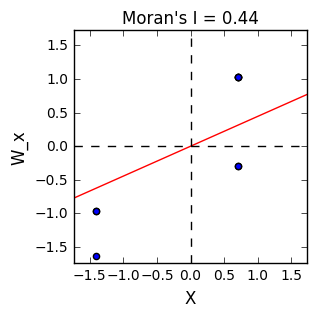

In [215]:
plt.subplots(figsize = (3,3))

x_stand = [(i-np.mean(x))/np.std(x) for i in x]
w_x = pysal.lag_spatial(w, x)
wx_stand = [(i-np.mean(w_x))/np.std(w_x) for i in w_x]

max_num = max(abs(np.array(x_stand+wx_stand)))+0.1

plt.scatter(x_stand, wx_stand)
plt.plot([-max_num, max_num], [-max_num*morans_I.I, max_num*morans_I.I], color='red', linestyle='-', linewidth=1)
plt.ylabel('W_x', fontsize=12)
plt.xlabel('X', fontsize=12)
plt.plot([0, 0], [-max_num, max_num], 'k--')
plt.plot([-max_num, max_num], [0, 0], 'k--')
plt.xlim(-max_num, max_num)
plt.ylim(-max_num, max_num)
plt.title("Moran's I = %0.2f" % morans_I.I)
plt.show()

### (b) Outlier pattern (high/low surrounded by low/high)

In [216]:
x = np.array([1,0,1,0,1,0,1,0,1])
morans_I = pysal.Moran(x, w, two_tailed=True)
print "Moran's I:", morans_I.I, ', E[I]:', morans_I.EI, ', Z-score:', morans_I.z_norm, ', p-value:',morans_I.p_norm 

Moran's I: -0.95 , E[I]: -0.125 , Z-score: -3.49623538599 , p-value: 0.000471872247929


In [207]:
print pysal.lag_spatial(w, x)

[ 0.    1.    0.    1.    0.25  1.    0.    1.    0.  ]


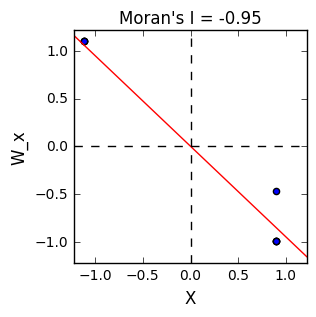

In [217]:
plt.subplots(figsize = (3,3))

x_stand = [(i-np.mean(x))/np.std(x) for i in x]
w_x = pysal.lag_spatial(w, x)
wx_stand = [(i-np.mean(w_x))/np.std(w_x) for i in w_x]

max_num = max(abs(np.array(x_stand+wx_stand)))+0.1

plt.scatter(x_stand, wx_stand)
plt.plot([-max_num, max_num], [-max_num*morans_I.I, max_num*morans_I.I], color='red', linestyle='-', linewidth=1)
plt.ylabel('W_x', fontsize=12)
plt.xlabel('X', fontsize=12)
plt.plot([0, 0], [-max_num, max_num], 'k--')
plt.plot([-max_num, max_num], [0, 0], 'k--')
plt.xlim(-max_num, max_num)
plt.ylim(-max_num, max_num)
plt.title("Moran's I = %0.2f" % morans_I.I)
plt.show()

### (c) Random pattern

In [220]:
x = np.random.randint(10, size=9)
print x
morans_I = pysal.Moran(x, w, two_tailed=True)
print "Moran's I:", morans_I.I, ', E[I]:', morans_I.EI, ', Z-score:', morans_I.z_norm, ', p-value:',morans_I.p_norm

[1 6 6 8 6 2 3 1 2]
Moran's I: -0.0647773279352 , E[I]: -0.125 , Z-score: 0.255215317711 , p-value: 0.7985568009


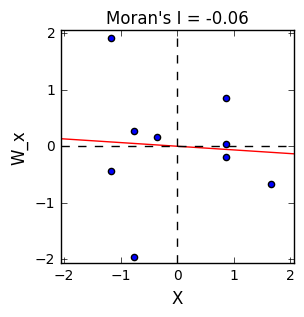

In [221]:
plt.subplots(figsize = (3,3))

x_stand = [(i-np.mean(x))/np.std(x) for i in x]
w_x = pysal.lag_spatial(w, x)
wx_stand = [(i-np.mean(w_x))/np.std(w_x) for i in w_x]

max_num = max(abs(np.array(x_stand+wx_stand)))+0.1

plt.scatter(x_stand, wx_stand)
plt.plot([-max_num, max_num], [-max_num*morans_I.I, max_num*morans_I.I], color='red', linestyle='-', linewidth=1)
plt.plot([0, 0], [-max_num, max_num], 'k--')
plt.plot([-max_num, max_num], [0, 0], 'k--')
plt.ylabel('W_x', fontsize=12)
plt.xlabel('X', fontsize=12)
plt.xlim(-max_num, max_num)
plt.ylim(-max_num, max_num)
plt.title("Moran's I = %0.2f" % morans_I.I)
plt.show()

## 1.2 [Geary's C](http://pysal.readthedocs.io/en/latest/users/tutorials/autocorrelation.html#geary-s-c)

$$\textrm{C} = \frac{(N-1)}{2S_0}\frac{\sum_{ij} W_{ij}(X_i-X_j)^2}{\sum_i (X_i-\bar{X})^2}$$

where $S_0 =\sum_{ij}W_{ij}$. Geary's $C$ ranges from 0 (maximal positive autocorrelation) to a positive value for high negaive autocorrelation. $C=1$ denotes the absence of autocorrelation and regardless of weight matrix. $C<1$ indicates positive spatial autocorrelation.

Moran's I is a more global measure and sensitive to extreme values of features X, whereas Geary's C is more sensitive to differences in small neighborhoods. Usually people use Moran's I.

### (a) Clustering pattern (high/low surrounded by high/low) 

In [88]:
x = np.array([1,1,1,1,1,1,0,0,0])
geary_C = pysal.Geary(x, w)
print help(geary_C)

Help on Geary in module pysal.esda.geary object:

class Geary(__builtin__.object)
 |  Global Geary C Autocorrelation statistic
 |  
 |  Parameters
 |  ----------
 |  y              : array
 |                   (n, 1) attribute vector
 |  w              : W
 |                   spatial weights
 |  transformation : {'B', 'R', 'D', 'U', 'V'}
 |                   weights transformation, default is binary.
 |                   Other options include "R": row-standardized, "D":
 |                   doubly-standardized, "U": untransformed (general
 |                   weights), "V": variance-stabilizing.
 |  permutations   : int
 |                   number of random permutations for calculation of
 |                   pseudo-p_values
 |  
 |  Attributes
 |  ----------
 |  y              : array
 |                   original variable
 |  w              : W
 |                   spatial weights
 |  permutations   : int
 |                   number of permutations
 |  C              : float
 |     

In [87]:
print "Geary's C:", geary_C.C, ', E[C]:', geary_C.EC, ', Z-score:', geary_C.z_norm, ', p-value:', geary_C.p_norm 

Geary's C: 0.444444444444 , E[C]: 1.0 , Z-score: -2.48793512434 , p-value: 0.00642435845367


### (b) Outlier pattern (high/low surrounded by low/high)

In [89]:
x = np.array([1,0,1,0,1,0,1,0,1])
geary_C = pysal.Geary(x, w)
print "Geary's C:", geary_C.C, ', E[C]:', geary_C.EC, ', Z-score:', geary_C.z_norm, ', p-value:', geary_C.p_norm 

Geary's C: 1.75 , E[C]: 1.0 , Z-score: 3.35871241786 , p-value: 0.000391532562852


### (c) Random pattern

In [92]:
x = np.random.randint(10, size=9)
geary_C = pysal.Geary(x, w)
print "Geary's C:", geary_C.C, ', E[C]:', geary_C.EC, ', Z-score:', geary_C.z_norm, ', p-value:', geary_C.p_norm 

Geary's C: 1.02264150943 , E[C]: 1.0 , Z-score: 0.10139509186 , p-value: 0.459618416262


# 2 Local Spatial Autocorrelation

## 2.1 [Local Moran's I](http://pysal.readthedocs.io/en/latest/users/tutorials/autocorrelation.html#local-moran-s-i)

$$\textrm{I}_i = (X_i-\bar{X})\frac{\sum_{j} W_{ij}(X_j-\bar{X})}{\big(\sum_{j \ne i} (X_j-\bar{X})^2/(N-1)\big)}$$

The local Moran's I is a list or array; where each number denotes Moran's I for a location. Some literatures use LISA (local indication of spatial association) to denote local Moran's I.

### (a) Clustering pattern (high/low surrounded by high/low)

In [260]:
np.random.seed(12345)
x = np.array([1,1,1,1,1,1,0,0,0])
lmi = pysal.Moran_Local(x,w)
lmi.n

9

In [238]:
help(lmi)

Help on Moran_Local in module pysal.esda.moran object:

class Moran_Local(__builtin__.object)
 |  Local Moran Statistics
 |  
 |  
 |  Parameters
 |  ----------
 |  y              : array
 |                   (n,1), attribute array
 |  w              : W
 |                   weight instance assumed to be aligned with y
 |  transformation : {'R', 'B', 'D', 'U', 'V'}
 |                   weights transformation,  default is row-standardized "r".
 |                   Other options include
 |                   "B": binary,
 |                   "D": doubly-standardized,
 |                   "U": untransformed (general weights),
 |                   "V": variance-stabilizing.
 |  permutations   : int
 |                   number of random permutations for calculation of pseudo
 |                   p_values
 |  geoda_quads    : boolean
 |                   (default=False)
 |                   If True use GeoDa scheme: HH=1, LL=2, LH=3, HL=4
 |                   If False use PySAL Scheme: HH=1, 

`lmi.Is` gives local Moran's I values

In [250]:
print lmi.Is

[  4.44444444e-01   4.44444444e-01   4.44444444e-01   3.48909435e-17
   4.44444444e-01   3.48909435e-17   4.44444444e-01   8.88888889e-01
   4.44444444e-01]


`lmi.q` gives values 1-4, indicating quandrant location: 1-HH,  2-LH,  3-LL,  4-HL.

In [252]:
lmi.q

array([1, 1, 1, 1, 1, 1, 3, 3, 3])

`lmi.p_sim` provides p-value for each location. 

In [254]:
lmi.p_sim

array([ 0.351,  0.177,  0.379,  0.177,  0.081,  0.186,  0.022,  0.001,
        0.032])

And one can exmaine areas whose LISA is significant:

In [261]:
sig = lmi.p_sim < 0.05
print lmi.p_sim[sig], lmi.q[sig], np.array(ids)[sig]

[ 0.022  0.001  0.032] [3 3 3] ['G' 'H' 'I']


### (b) Outlier pattern (high/low surrounded by low/high)¶

In [263]:
x = np.array([1,0,1,0,1,0,1,0,1])
lmi = pysal.Moran_Local(x,w)
sig = lmi.p_sim < 0.05
print lmi.Is, lmi.q[sig]
print lmi.p_sim[sig], np.array(ids)[sig]

[-0.88888889 -0.88888889 -0.88888889 -0.88888889 -0.48888889 -0.88888889
 -0.88888889 -0.88888889 -0.88888889] [4 2 4 2 4 2 4 2 4]
[ 0.001  0.001  0.001  0.001  0.017  0.001  0.001  0.001  0.001] ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I']
